In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading transaction data
data=pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
#Quicklook
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#Importing label encoder for categorical transcation type
#importing the Isolation Forest alorithm for Anomaly detection 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Create a label encoder instance
label_encoder = LabelEncoder()
# Encoding the 'type' column
data['type_encoded'] = label_encoder.fit_transform(data['type'])

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,3
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,4
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,4
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,4


In [6]:
# Data Preprocessing
scaler = StandardScaler()
data['amount'] = scaler.fit_transform(data['amount'].values.reshape(-1, 1))
data['oldbalanceOrg'] = scaler.fit_transform(data['oldbalanceOrg'].values.reshape(-1, 1))
data['oldbalanceDest'] = scaler.fit_transform(data['oldbalanceDest'].values.reshape(-1, 1))
data['newbalanceDest'] = scaler.fit_transform(data['newbalanceDest'].values.reshape(-1, 1))
data['newbalanceOrig'] = scaler.fit_transform(data['newbalanceOrig'].values.reshape(-1, 1))

# Split data --> features & labels
X = data.drop(['type', 'nameDest', 'nameOrig', 'isFlaggedFraud', 'isFraud'], axis=1)
y = data['isFraud']

# Split the data --> Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,PAYMENT,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,3
1,1,PAYMENT,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,3
2,1,TRANSFER,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,4
3,1,CASH_OUT,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,1
4,1,PAYMENT,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,0.264665,C786484425,-0.171108,-0.292442,C776919290,-0.323814,-0.240959,1,0,1
6362616,743,TRANSFER,10.153953,C1529008245,1.896491,-0.292442,C1881841831,-0.323814,-0.333411,1,0,4
6362617,743,CASH_OUT,10.153953,C1162922333,1.896491,-0.292442,C1365125890,-0.303665,1.403027,1,0,1
6362618,743,TRANSFER,1.109765,C1685995037,0.005581,-0.292442,C2080388513,-0.323814,-0.333411,1,0,4


In [7]:
#Unique Transaction Types
unique_types=data['type'].unique()
unique_types

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
#Flaged fraud transaction type by an unknown fraud detection System.
unique_types_flagged_fraud = data[data['isFraud'] == 1]['type'].unique()
print("Unique 'type' values where 'isFlaggedFraud' is equal to 1:", unique_types_flagged_fraud)

Unique 'type' values where 'isFlaggedFraud' is equal to 1: ['TRANSFER' 'CASH_OUT']


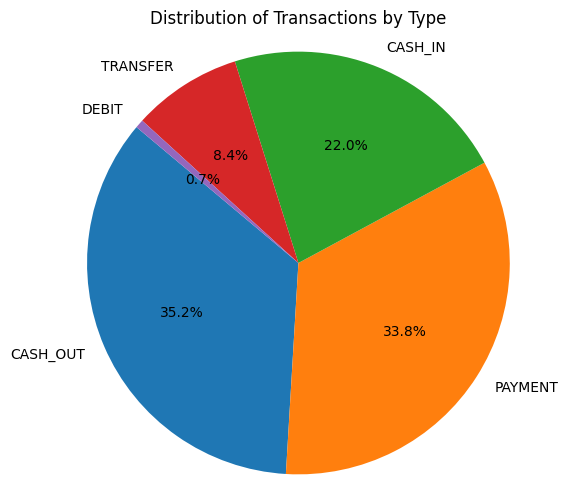

In [30]:
#Frequency of each 'type'
type_counts = data['type'].value_counts()

# labels and values
labels = type_counts.index
values = type_counts.values

# Pie chart Distribution
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie -->Circle.
plt.show()

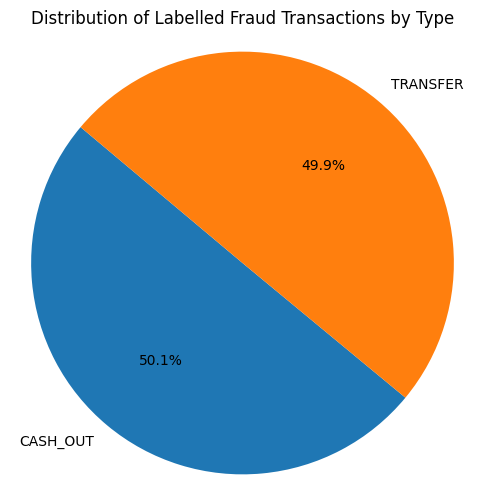

In [32]:
# Frequency of each Fraud labelled Transaction 'type'
ftyp_c = data[data['isFraud'] == 1]['type'].value_counts()

# labels and values
labels = ftyp_c.index
values = ftyp_c.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labelled Fraud Transactions by Type')
plt.axis('equal')  
plt.show()

In [28]:
# Anomaly detection with Isolation Forest
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_train)
y_pred = clf.predict(X_test)

c:\Users\ARIHANT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
# Model Evaluation
y_pred[y_pred == 1] = 0  # Predicted normal
y_pred[y_pred == -1] = 1  # Predicted anomaly

In [30]:
#Accuracy Report of Isolation Forest Anomaly Detection
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9888646500969727
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    635445
           1       0.01      0.08      0.02       817

    accuracy                           0.99    636262
   macro avg       0.50      0.53      0.51    636262
weighted avg       1.00      0.99      0.99    636262



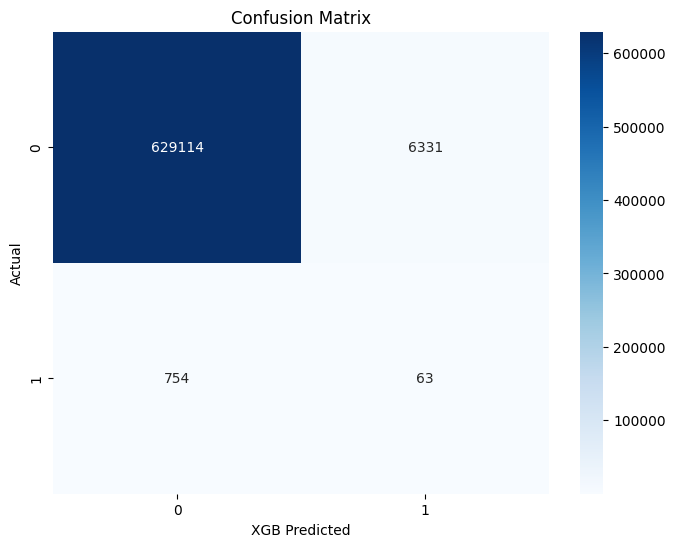

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined as you have them
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('XGB Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#Extreme Gradient Boosting Classification
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Creation and Configuration of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    max_depth=3,  # Maximum depth 
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Number of boosting rounds
    random_state=42
)

# Fit Train Data
xgb_classifier.fit(X_train, y_train)

#Test data Predictions
y_predxgb = xgb_classifier.predict(X_test)

# Classifier Evaluation
accuracy1 = accuracy_score(y_test, y_pred)
report1 = classification_report(y_test, y_pred)

print("Accuracy:", accuracy1)
print("Classification Report:")
print(report1)

Accuracy: 0.9995929349859021
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.98      0.70      0.81       817

    accuracy                           1.00    636262
   macro avg       0.99      0.85      0.91    636262
weighted avg       1.00      1.00      1.00    636262



In [25]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

#Probabilities for the positive class (fraud)
y_probxgb = xgb_classifier.predict_proba(X_test)[:, 1]

#ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probxgb)

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.997790239673692


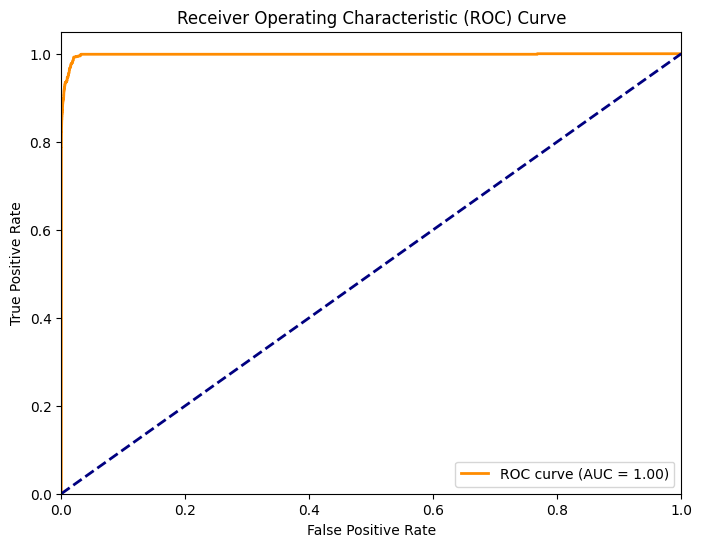

In [26]:

fprxgb, tprxgb, thresholdsxgb = roc_curve(y_test, y_probxgb)
roc_auc = auc(fprxgb, tprxgb)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
#Loading transaction data
data1=pd.read_csv('PS_20174392719_1491204439457_log.csv')
data1


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [36]:
data1.isna().sum()
#clean dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [39]:
data1['type_encoded'] = label_encoder.fit_transform(data1['type'])
data1.drop(columns='type',inplace=True)

In [41]:
data1.drop(columns=['nameDest','nameOrig'],inplace=True)

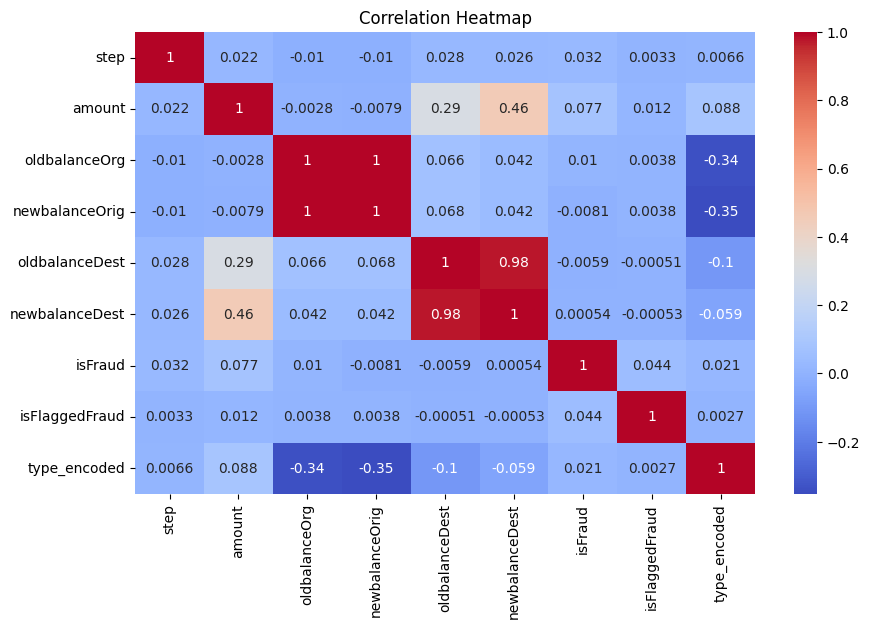

In [42]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = data1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


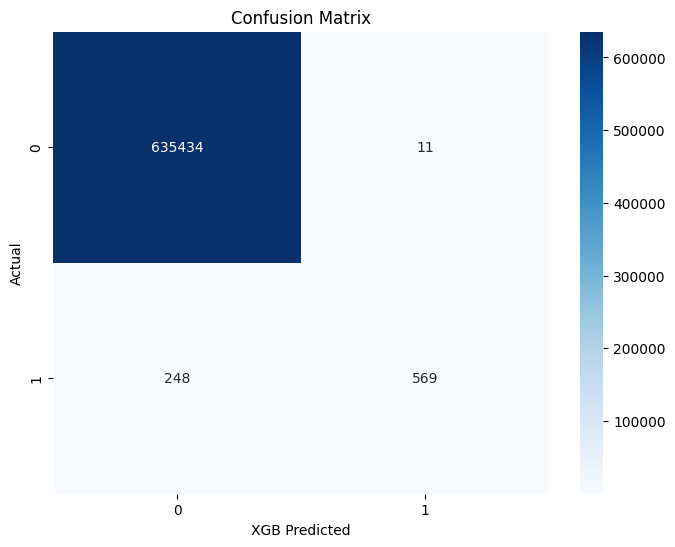

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined as you have them
conf_matrix = confusion_matrix(y_test, y_predxgb)

conf_matrix = confusion_matrix(y_test, y_predxgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('XGB Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#Intensity of fraud amount 
data1[data1['isFraud']==1]['amount'].describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64